In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("titanic.csv")

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Age'].fillna(df['Age'].median(), inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Select features
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions):.2f}")

# Save predictions for Tableau
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = predictions
results.to_csv("titanic_predictions.csv")

Accuracy: 0.82


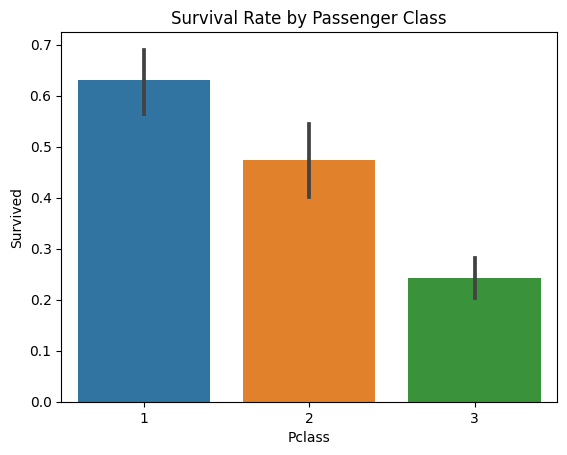

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.savefig('class_survival.png')